The company who supplied the data want to know about products that don’t sell well or aren’t very profitable or cost too much to market or …

Last week we looked at time-series and trends averages, rolling averages, trendlines, …

Today we take a closer look at how some of those trends may be related to each other using two further standard visualisations scatter plots heat maps.
 
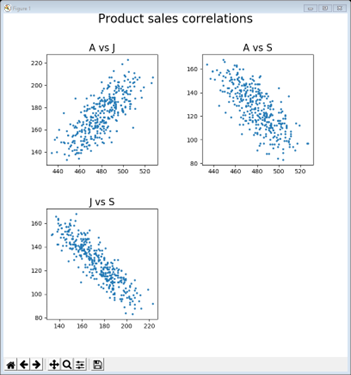  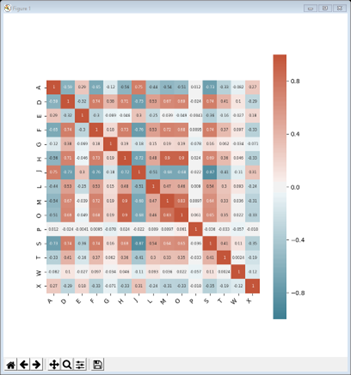

In [3]:
# import the libraries & read in the data

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


plt.style.use("ggplot")

In [4]:
data = pd.read_csv("https://tinyurl.com/ChrisCoDV/Products/DailySales.csv", index_col=0)
# pd.plotting.register_matplotlib_converters()
# data.index = pd.to_datetime(data.index)
data.head()

,A,B,C,D,E,F,G,H,I,J,...,P,Q,R,S,T,U,V,W,X,Y
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,526,3,9,0,66,472,260,116,45,202,...,85,38,0,97,19,7,0,174,55,12
2019-01-02,504,11,10,0,57,472,157,108,3,223,...,73,0,0,92,45,0,14,132,65,8
2019-01-03,499,0,10,0,42,475,154,104,0,199,...,65,20,5,84,89,0,4,132,39,6
2019-01-04,504,0,7,0,57,464,149,83,17,198,...,83,19,0,89,0,0,14,143,57,20
2019-01-05,499,15,9,0,31,466,159,84,14,219,...,97,31,0,104,0,8,28,46,44,15


In [5]:
data.sum()



A    175173
B      4489
C      3649
D     18672
E     17449
F    176462
G     45193
H     51118
I      5249
J     63273
K      3346
L    141115
M     25577
N      6011
O     25573
P     29187
Q      6272
R      2457
S     46225
T     20944
U      3069
V      5330
W     53517
X     15809
Y      5468
dtype: int64

Correlation refers to a mutual relationship between two or more things or formally in statistics it refers to the interdependence of variables. For example, we can expect a positive correlation between temperature and ice cream sales when it’s hot, people buy more ice cream. Or we can expect an inverse (or negative) correlation between temperature and sales of gloves when it’s hot, people buy fewer gloves. However, there is a famous saying, that “correlation is not causation” meaning that just because two things are related does not mean one causes the other. For example, as ice cream sales increase, so do cases of sunburn ice cream sales and sunburn are probably correlated but eating ice cream does not cause sunburn There are a whole list of examples at
https://en.wikipedia.org/wiki/Correlation_does_not_imply_causation



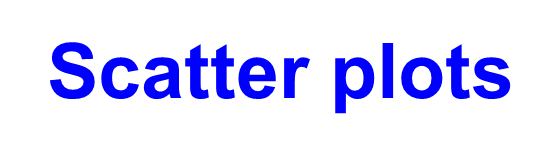


The usual way to visualise correlation is with a scatter plot
take any two variables, e.g. A & B, with common index values (e.g. dates)
for each index value (e.g. each date), plot A’s value along the x-axis against B’s value on the y-axis with a small dot at the location (A, B)
If you get
a diagonal line sloping upwards, left to right, the variables are positively correlated
a diagonal line sloping downwards, left to right, the variables are negatively (inversely) correlated
randomly scattered dots, the variables are not correlated

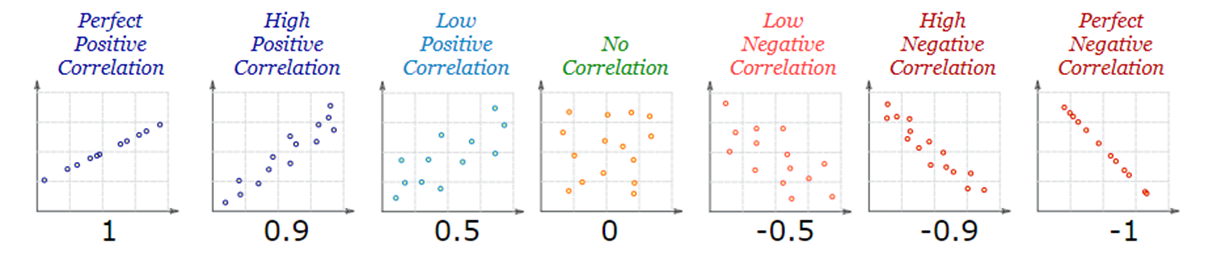

Source: https://www.mathsisfun.com/data/correlation.html

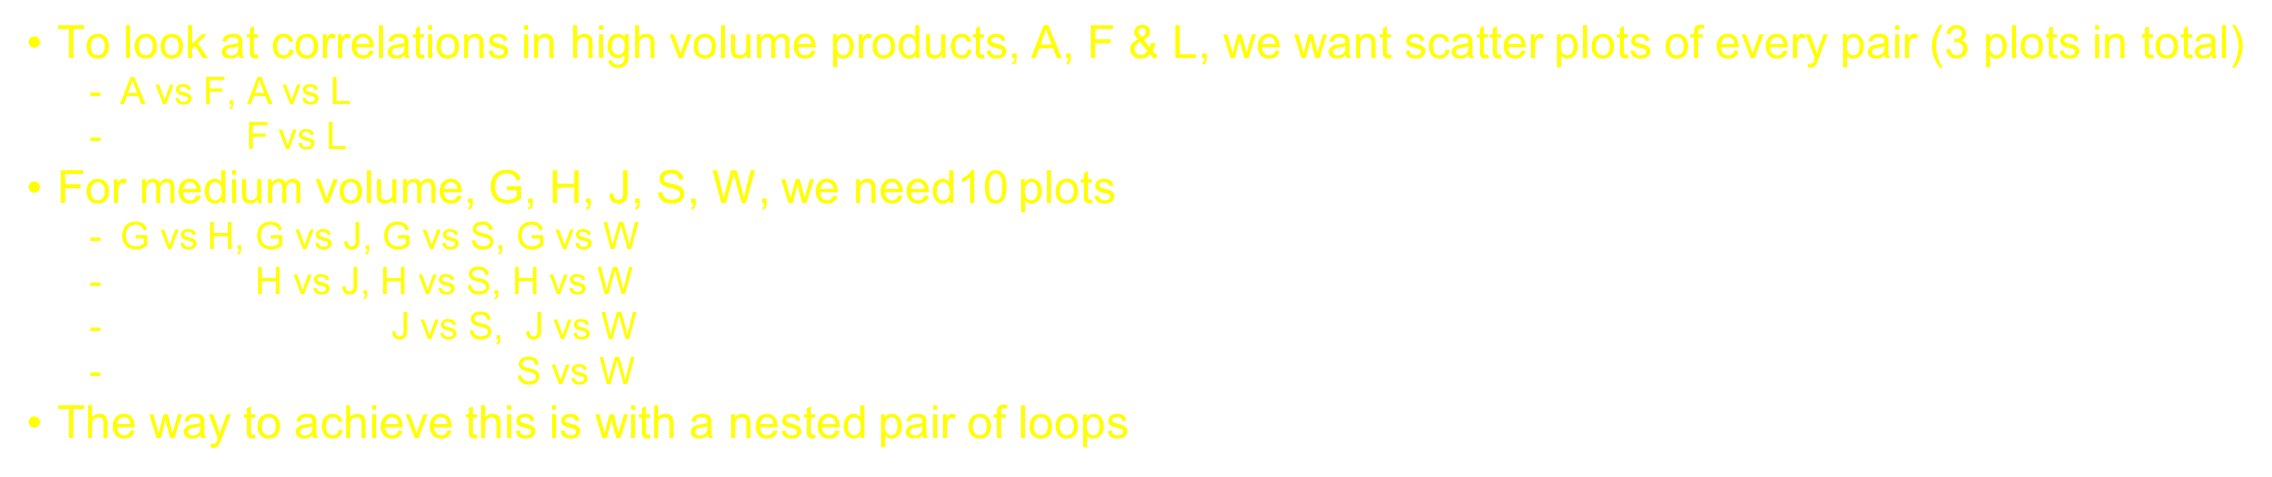

The way to achieve this is with a nested pair of loops

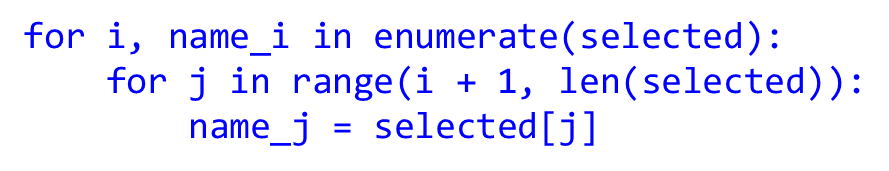

if selected contains a list of products, then each iteration name_i will contain one product name and name_j another
if there are n items in selected, it produces ½ n(n-1) plots


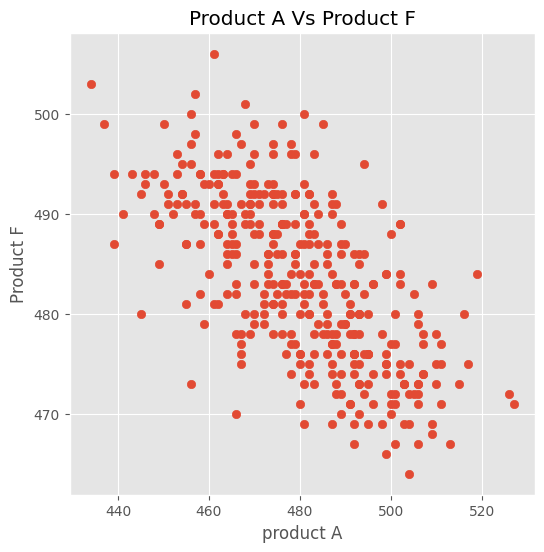

In [6]:
# The following code creates the 3 plots on the right

high_sales = ["A", "F", "L"]
fig, ax = plt.subplots(figsize=(6,6))
for i, name_i in enumerate(high_sales):
    for j in range(i+1, len(high_sales)):
        name_j = high_sales[j]
        ax.scatter(data[name_i], data[name_j])
        ax.set(title=f"Product {name_i} Vs Product {name_j}",
               xlabel=f"product {name_i}",
               ylabel=f"Product {name_j}")
        plt.show()


The single line in `ax.scatter(data[name_i], data[name_j])` actually creates the scatter plot
As before, the other lines prepare each figure, add labels and title and finally show it 

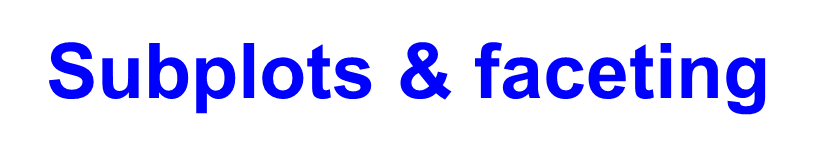

Visualising correlations like this involves a lot of scatter plots
- for the 3 high volume products we need 3 plots
- for the 5 medium volume products we need 10
- for the 7 low volume products we would need 21!

Rather than creating a separate plot each time, we can produce a single figure with lots of subplots
- useful in lots of situations, not just correlations

This is also known as <b>`faceting`</b>
- each subplot shows a different facet of the visualisation

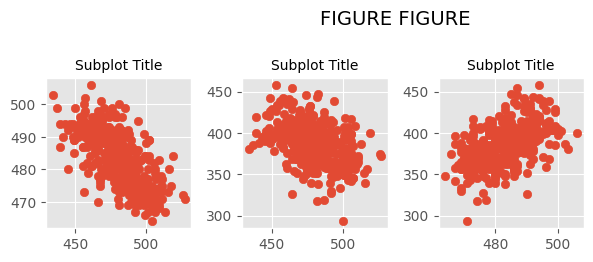

In [7]:
counter = 1
fig = plt.figure(figsize=(8,8))
fig.suptitle("FIGURE FIGURE", fontsize=14, position=(.5, 1.0))

for i, name_i in enumerate(high_sales):
    for j in range(i+1, len(high_sales)):
        name_j = high_sales[j]
        sub = fig.add_subplot(4,4,counter)
        sub.set_title("Subplot Title", fontsize=10)
        # ===============================================
        # draw suplots here
        plt.scatter(data[name_i], data[name_j])
        # ==============================================
        counter += 1

plt.subplots_adjust(wspace=1.0, hspace=1.0)
plt.tight_layout()
plt.show()


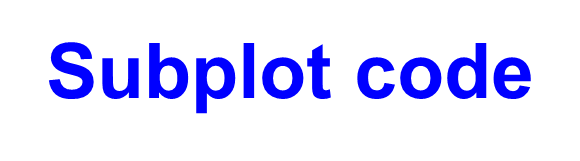

Typical code for creating subplots looks like this


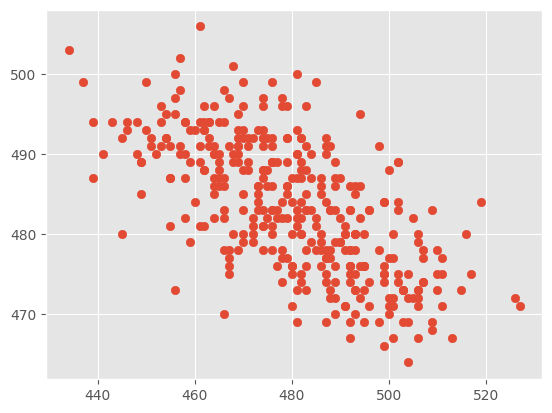

In [8]:
plt.scatter(data["A"], data["F"])
plt.show()

# 02ScatterPlot medium volume subplots.py

The following code creates the 10 subplots. The single line in bold actually creates the scatter plot the parameter s=0.5 changes the size of the dots.



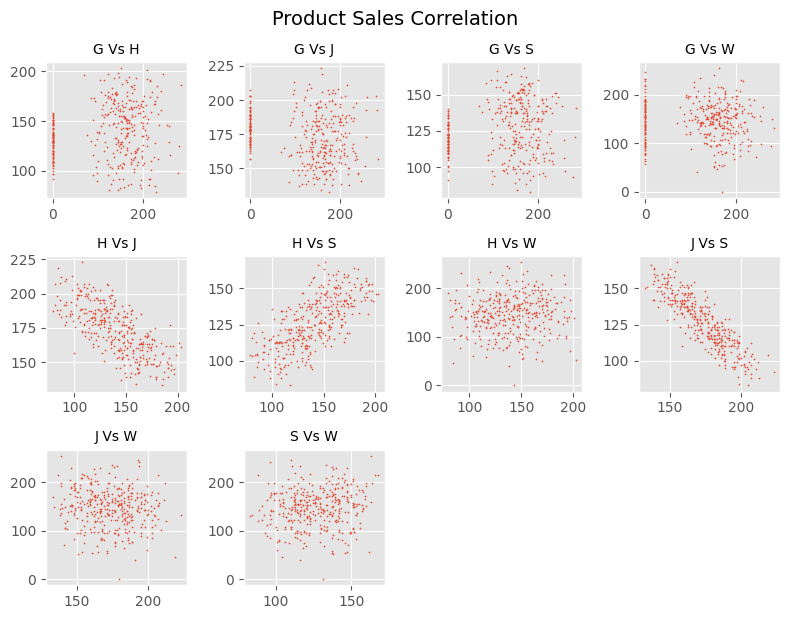

In [9]:
medium_sales = ["G", "H", "J", "S", "W"]
counter = 1

fig = plt.figure(figsize=(8,8))
fig.suptitle("Product Sales Correlation", fontsize=14)

for i, name_i in enumerate(medium_sales):
    for j in range(i+1, len(medium_sales)):
        name_j = medium_sales[j]
        sub = fig.add_subplot(4, 4, counter)
        sub.set_title(name_i + " Vs " + name_j, fontsize=10)
        sub.scatter(data[name_i], data[name_j], s=.5)
        counter += 1

plt.subplots_adjust(wspace=.5, hspace=.5)
plt.tight_layout()
plt.show()

## 03ScatterPlot low volume subplots.py
The following code creates the 21 subplots
Notice that the parameters of add_subplot() have changed from 4, 4 previously to 5, 5 because 21 subplots will not fit in 4 x 4 = 16 slots

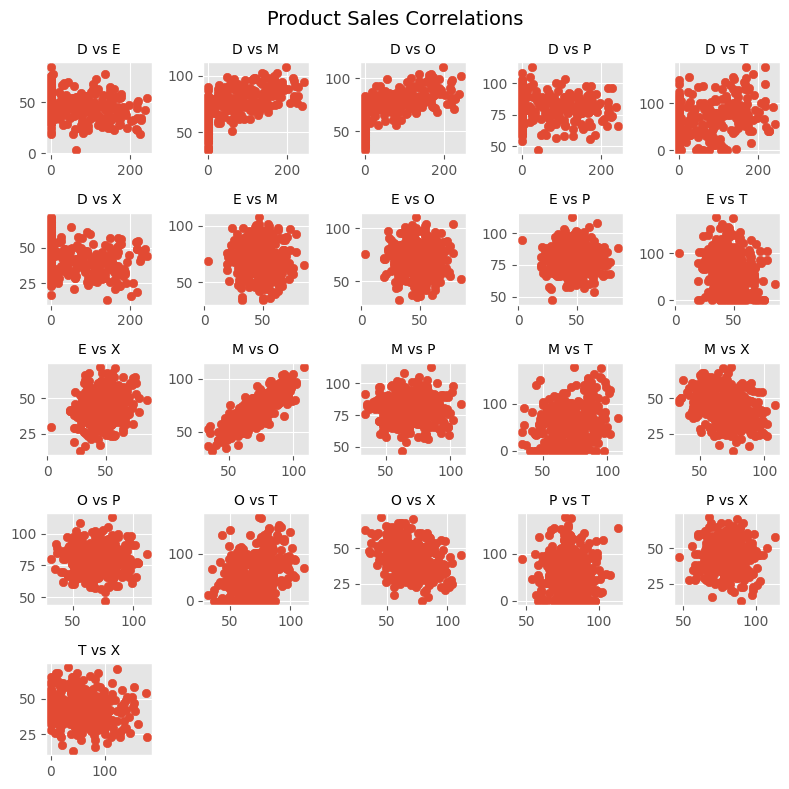

In [10]:
low_sales = ["D", "E", "M", "O", "P", "T", "X"]
counter = 1

fig = plt.figure(figsize=(8,8))
fig.suptitle("Product Sales Correlations", fontsize=14)

for i, name_i in enumerate(low_sales):
    for j in range(i+1, len(low_sales)):
        name_j = low_sales[j]
        sub = fig.add_subplot(5, 5, counter)
        sub.scatter(data[name_i], data[name_j])
        sub.set_title(name_i + " vs " + name_j, fontsize=10)
        counter += 1

plt.subplots_adjust(wspace=.5, hspace=.5)
plt.tight_layout()
plt.show()

## Interpretation

Remembering that correlation does not imply causation … what does it mean if one product is correlated with another?
- It may mean that when someone buys product M they also buy product O at the same time
  - for example, table and chairs (assuming they’re sold separately)
- It may mean there’s some underlying cause so that both products tend to be bought at the same time of year
  - for example, ice cream and sunblock
- And the same is true for negative correlation which can be seasonal
  - for example, ice cream and gloves
- Or negative correlation might mean that tastes are changing
  - for example, people switching from latte to flat white coffees
- Our role as data scientists is to highlight correlation, not establish causation
- However, it might then make sense to group strongly correlated variables together
for example, table and chairs


<!--  -->

# Correlation coefficient

- You might realise that finding correlations by looking at scatter plots is tedious and error prone
	- to check the correlations for all 25 products against each other we would need to look at 300 subplots
	- if there’s 250 products then its 31,250 subplots!
- You might also guess that there’s a way of measuring correlation numerically
	- in fact there are several and Pandas will calculate at least 3 different versions for you with .corr()
- The default version in Pandas is the Pearson correlation coefficient
	- expressed as a number between -1 (perfect negative correlation) and +1 (perfect positive correlation)



# Heat maps

- Even with Pandas calculating correlations we still need to visualise them somehow
	- for 25 products, Pandas calculates 25 x 24 = 600 correlation coefficients
- The standard way to do this is with a heat map
	- a coloured chart where blue represents cold (-1) and red represents hot (+1)
- It’s certainly possible to do this in MatPlotLib
	- but it’s much easier using Seaborn, a high level visualisation library built on top of Pandas and MatPlotLib


## 04HeatMap correlation all.py


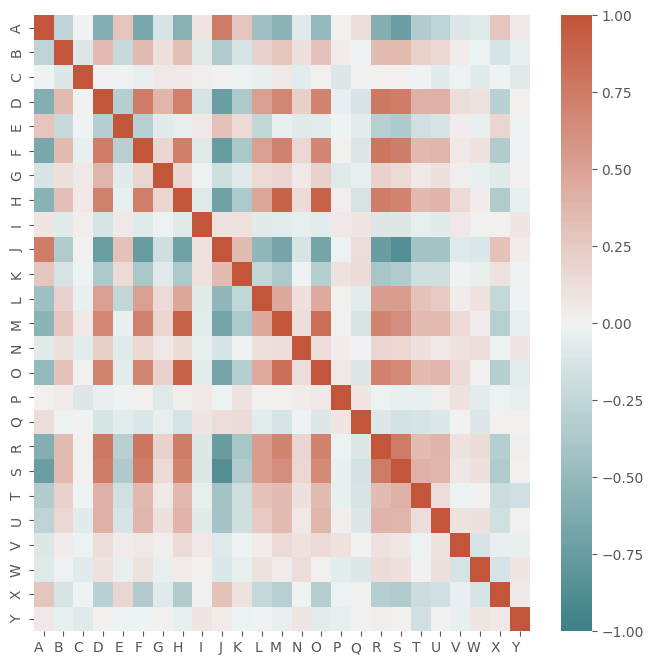

In [11]:
import seaborn as sns
plt.figure(figsize=(8,8))
cor = data.corr()

ax = sns.heatmap(cor, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(200, 20, n=200))
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment="right")
plt.show()

Then this code creates the heat map

All the diagonal squares are red as each time-series is perfectly correlated with itself
Apart from that you are looking for strong red colours (positive correlation) or strong blue (negative correlation)

<!--  -->

- Even with Pandas calculating correlations we still need to visualise them somehow
	- for 25 products, Pandas calculates 25 x 24 = 600 correlation coefficients
- The standard way to do this is with a heat map
	- a coloured chart where blue represents cold (-1) and red represents hot (+1)
- It’s certainly possible to do this in MatPlotLib
	- but it’s much easier using Seaborn, a high level visualisation library built on top of Pandas and MatPlotLib


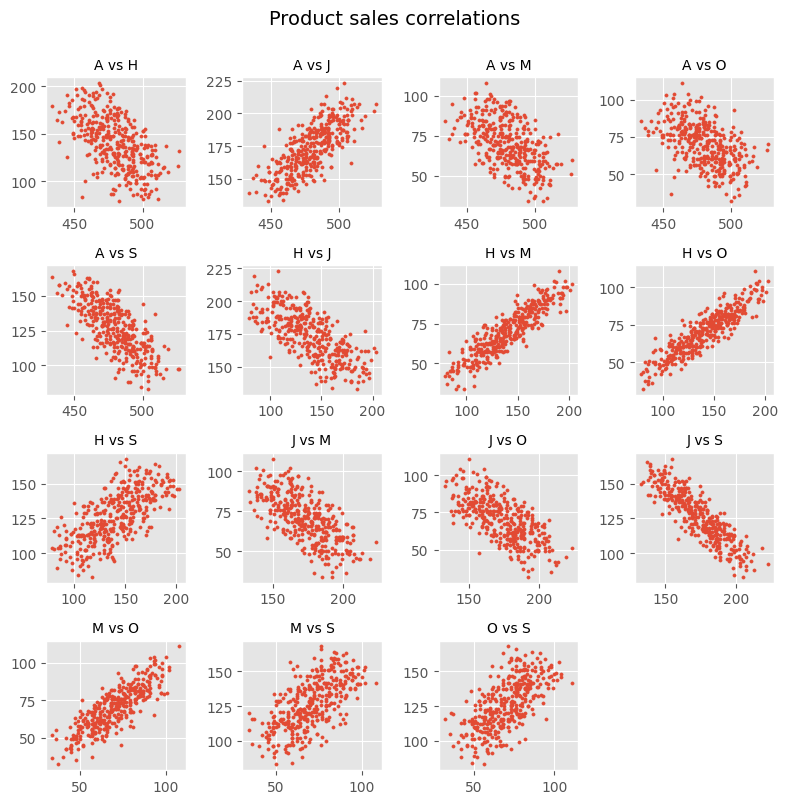

In [12]:
selected = ['A', 'H', 'J', 'M', 'O', 'S']

counter = 1
fig = plt.figure(figsize=(8, 8))
fig.suptitle('Product sales correlations',
    fontsize=14, position=(0.5, 1.0))
for i, name_i in enumerate(selected):
    for j in range(i + 1, len(selected)):
        name_j = selected[j]
        sub = fig.add_subplot(4, 4, counter)
        sub.set_title(name_i + ' vs ' + name_j,
            fontsize=10)
        sub.scatter(data[name_i], data[name_j], s=5)
        counter += 1
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.tight_layout()
plt.show()


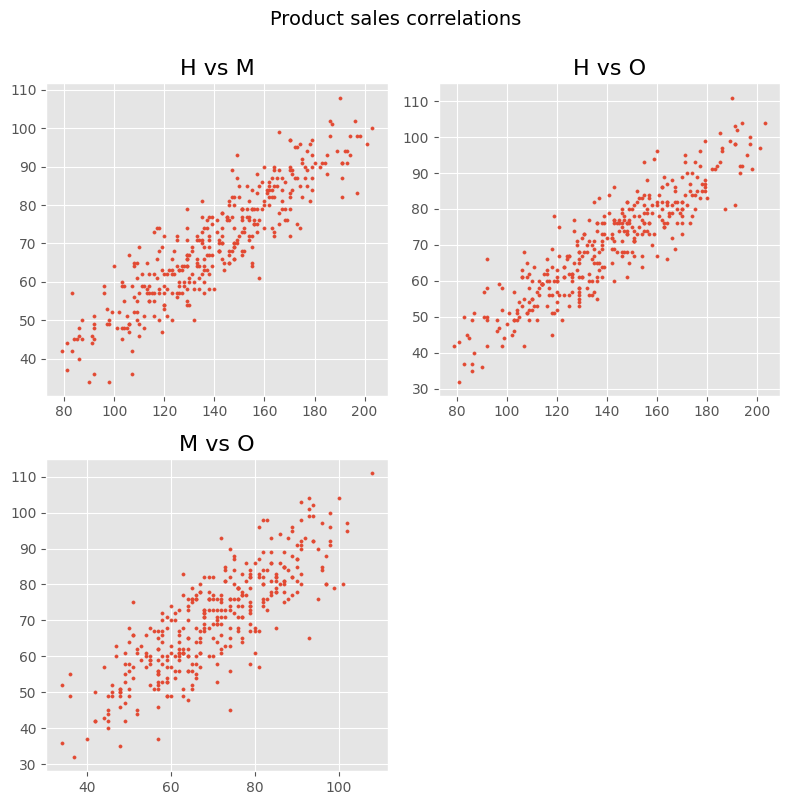

In [13]:
selected = ['H', 'M', 'O']

counter = 1
fig = plt.figure(figsize=(8, 8))
fig.suptitle('Product sales correlations',
    fontsize=14, position=(0.5, 1.0))
for i, name_i in enumerate(selected):
    for j in range(i + 1, len(selected)):
        name_j = selected[j]
        sub = fig.add_subplot(2, 2, counter)
        sub.set_title(name_i + ' vs ' + name_j,
            fontsize=16)
        sub.scatter(data[name_i], data[name_j], s=5)
        counter += 1
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.tight_layout()
plt.show()


## 05HeatMap correlation selected.py


There is still rather a lot of information and the company is not particularly interested in very low volume products
This code creates a heat map excluding very low volume
anything under 10,000 sales per year







The code also annotates the coefficients
annot_kws={"size": 8} sets the font size to 8pt
The strongest positive correlations are between H, M & O 
The strongest negative are between J & S
A is also correlated with J and negatively correlated with S




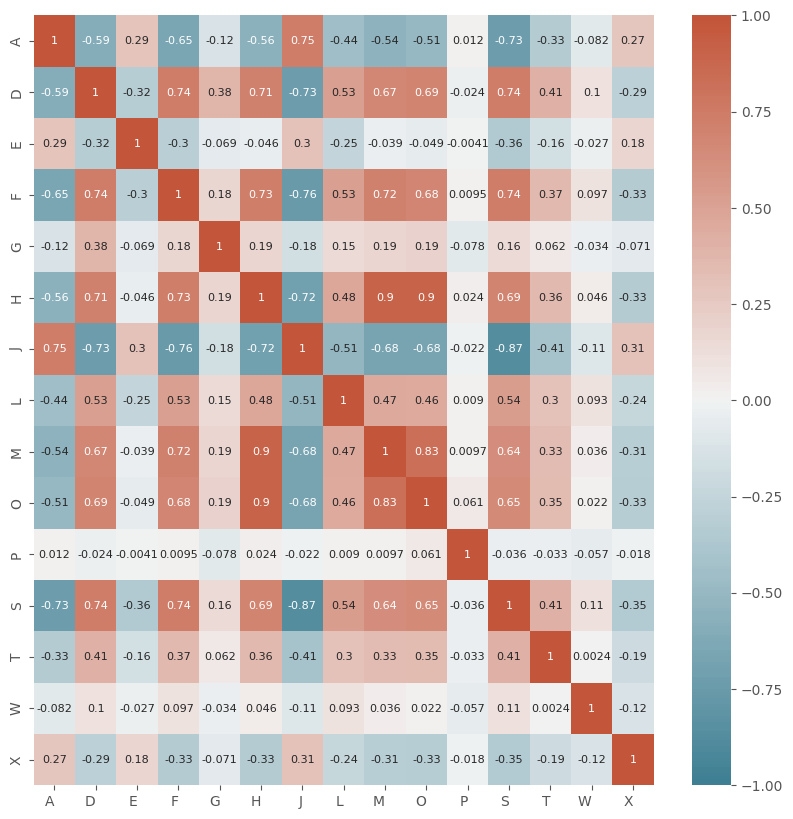

In [14]:
over_10 = data.columns[data.sum() > 10000]

plt.figure(figsize=(10,10))
corr = data[over_10].corr()

ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,
                 cmap=sns.diverging_palette(220, 20, n=200), 
                 annot=True, annot_kws={"size": 8})
ax.set_xticklabels(ax.get_xticklabels(), 
                   rotation=0,
                   horizontalalignment="right")
plt.show()

<AxesSubplot: >

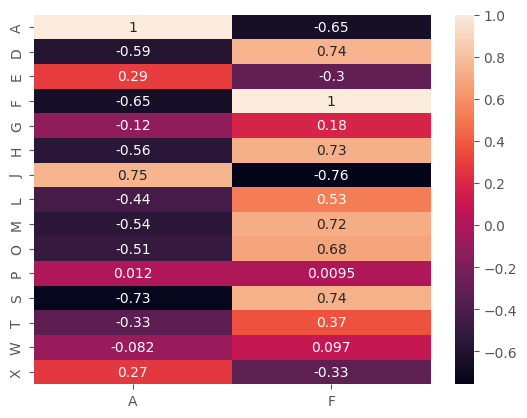

In [15]:
sns.heatmap(corr[["A", "F"]], annot=True)


In [16]:
def plot_this(data, selected: list, num: int):
    counter = 1
    fig = plt.figure(figsize=(8, 8))
    fig.suptitle('Product sales correlations', fontsize=14, position=(0.5, 1.0))
    for i, name_i in enumerate(selected):
        for j in range(i + 1, len(selected)):
            name_j = selected[j]
            sub = fig.add_subplot(num, num, counter)
            sub.set_title(name_i + ' vs ' + name_j, fontsize=16)
            sub.scatter(data[name_i], data[name_j], s=5)
            counter += 1
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.tight_layout()
    plt.show()


### Example 07 – positive correlation subplots

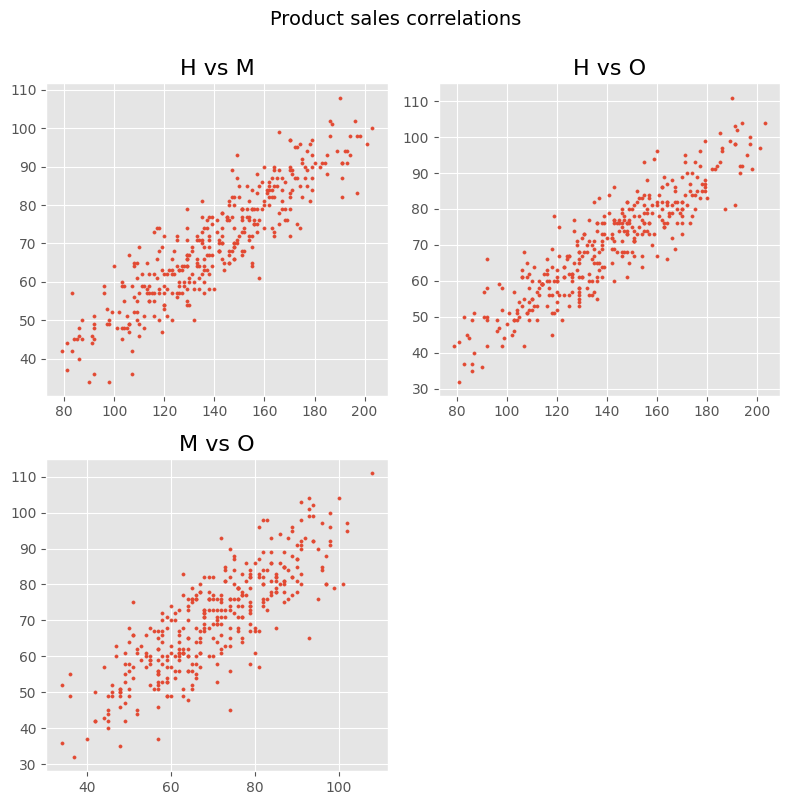

In [17]:
plot_this(data, selected=['H', 'M', 'O'], num=2)

### Example 08 - negative correlation subplots

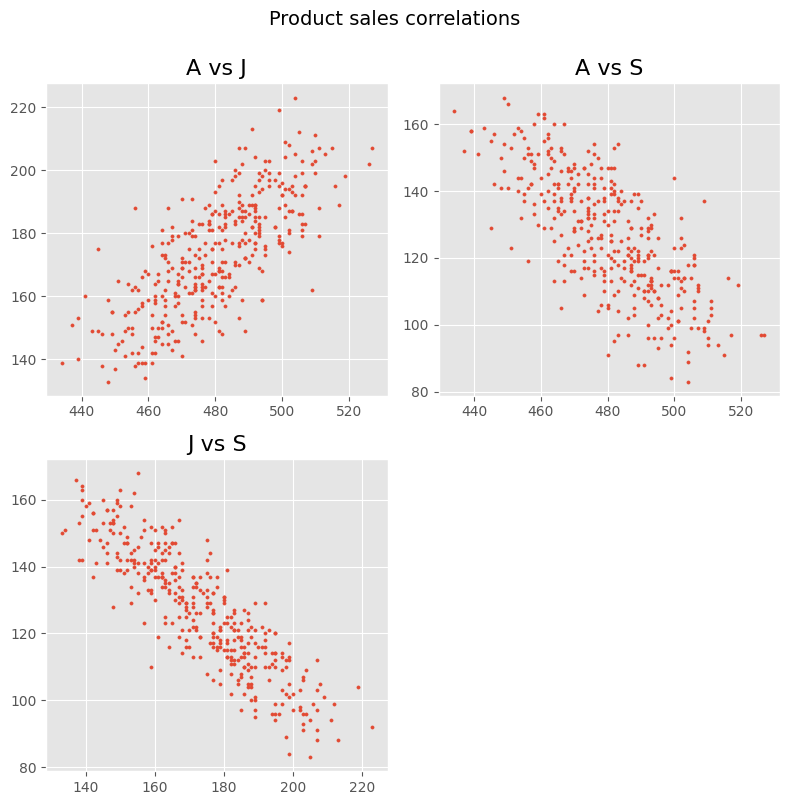

In [18]:
plot_this(data, selected=['A', 'J', 'S'], num=2)

### Example 09

Having identified correlated groups of time-series we can compare their line plots
- e.g. with a rolling average from example 05, last week

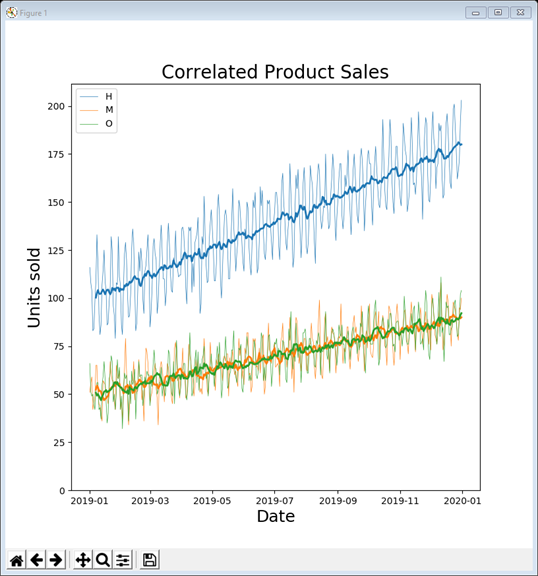


### Example 10

Having identified correlated groups of time-series we can compare their line plots
- e.g. with a rolling average from example 05, last week

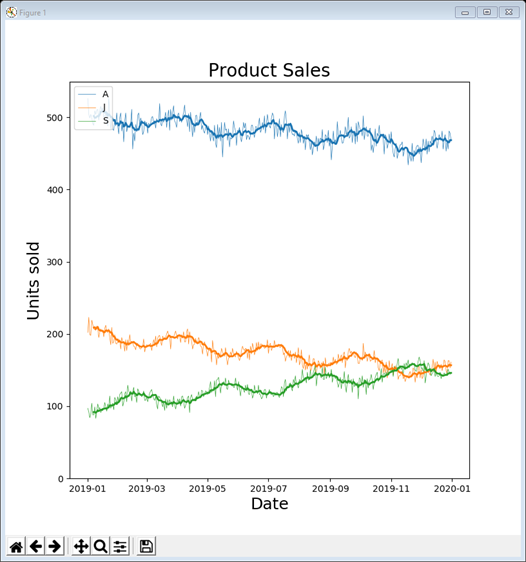

### Product comparisons

- So far we have looked at comparisons between time-series where the common index values are the dates
- However, correlations can be made between other things 
	- for example, the common index values could be the products themselves
	- then we can check correlations between price, profit, total sales, marketing, …
- To do this we need some more data

- marketing_data = pd.read_csv('https://tinyurl.com/ChrisCoDV/Products/MarketingPerProduct.csv’, index_col=0)
- price_per_unit = pd.read_csv('https://tinyurl.com/ChrisCoDV/Products/PricePerUnit.csv', index_col=0)
- profit_per_unit = pd.read_csv('https://tinyurl.com/ChrisCoDV/Products/ProfitPerUnit.csv', index_col=0)


## Summary data
- We can then construct a dataframe containing summary data
- summary_data contains 25 rows (one per product) and 5 columns:
    - Price: the retail price per unit (the price the customer pays, from £8 to £49)
    - Profit: the amount of profit per unit (from £1 to £25)
    - Sales: the total sales over the year calculated from the daily sales data
    - Marketing: the total marketing budget for this product (£0 to £44,000)
    Cost: the cost per unit calculated from the price and profit (the cost of manufacturing or buying in the product, from £6 to £45)


In [19]:
marketing_data = pd.read_csv("https://tinyurl.com/ChrisCoDV/Products/MarketingPerProduct.csv", index_col=0)
price_per_unit = pd.read_csv("https://tinyurl.com/ChrisCoDV/Products/PricePerUnit.csv", index_col=0)
profit_per_unit = pd.read_csv("https://tinyurl.com/ChrisCoDV/Products/ProfitPerUnit.csv", index_col=0)

summary_data = pd.DataFrame(index=data.columns)
summary_data['Price'] = price_per_unit.values
summary_data['Profit'] = profit_per_unit.values
summary_data['Sales'] = data.sum().values
summary_data['Marketing'] = marketing_data.values
summary_data['Cost'] = summary_data['Price'] - summary_data['Profit']
print(summary_data.describe())
summary_data.head()

          Price    Profit          Sales    Marketing       Cost
count  25.00000  25.00000      25.000000     25.00000  25.000000
mean   31.24000  10.80000   38025.080000  20360.00000  20.440000
std    11.71637   6.98212   51223.822256  13996.66627  11.554508
min     8.00000   1.00000    2457.000000      0.00000   6.000000
25%    21.00000   4.00000    5330.000000   6000.00000  12.000000
50%    29.00000  12.00000   18672.000000  25000.00000  15.000000
75%    42.00000  16.00000   46225.000000  29000.00000  28.000000
max    49.00000  25.00000  176462.000000  44000.00000  45.000000


,Price,Profit,Sales,Marketing,Cost
A,21,6,175173,21000,15
B,28,16,4489,3000,12
C,43,2,3649,3000,41
D,47,2,18672,42000,45
E,38,14,17449,13000,24


### 11ScatterPlot marketing vs sales.py

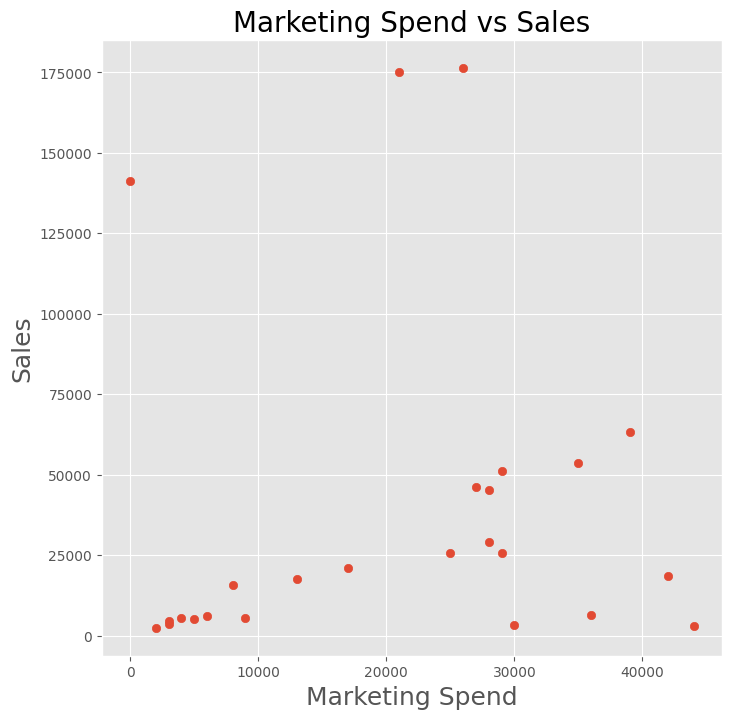

In [20]:
plt.figure(figsize=(8,8))
plt.scatter(summary_data["Marketing"], summary_data["Sales"])
plt.title("Marketing Spend vs Sales", fontsize=20)
plt.xlabel("Marketing Spend", fontsize=18)
plt.ylabel("Sales", fontsize=18)
plt.show()

### 12HeatMap summary correlation.py

The next example calculates a heat map for correlations between the 5 variables







There is only one really strong correlation – between price and cost
as you might expect – the more something costs to manufacture / buy in, the more the company will charge for it



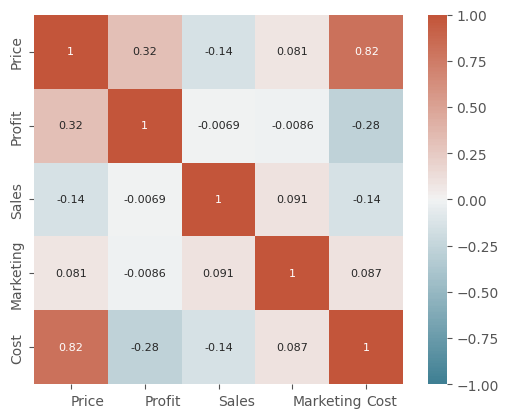

In [21]:
sd_corr = summary_data.corr()
ax = sns.heatmap(sd_corr, vmin=-1, vmax=1, center=0,
                 cmap=sns.diverging_palette(220, 20, n=200),
                 square=True, annot=True, annot_kws={"size": 8})

ax.set_xticklabels(ax.get_xticklabels(), horizontalalignment="left")
plt.show()



### 13ScatterPlot price vs cost + linear regression.py

Now we can visualise the scatter plot of price vs cost













Can even include a linear regression to show “average” price vs cost
strictly speaking not a trend line although it uses the same code



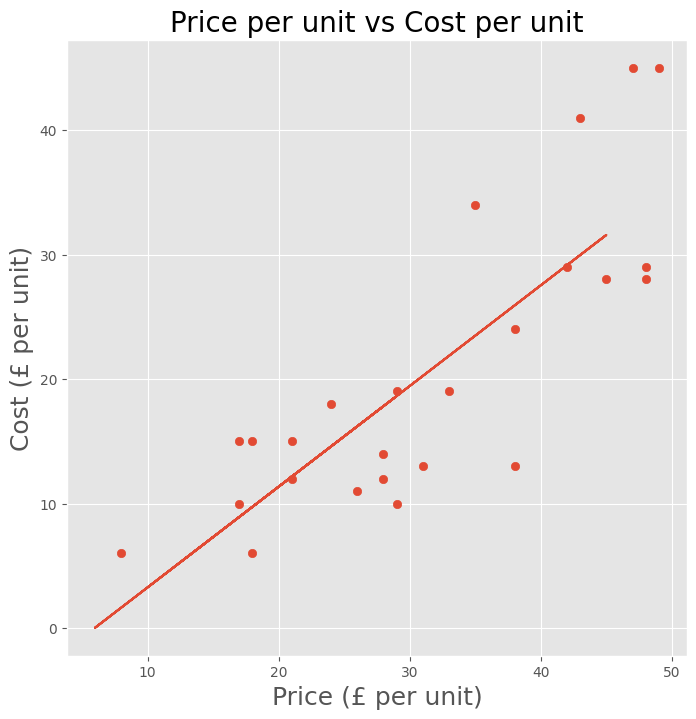

In [22]:
fig = plt.figure(figsize=(8,8))
plt.scatter(summary_data["Price"], summary_data["Cost"])
z = np.polyfit(summary_data["Price"], summary_data["Cost"], 1)
trend = np.poly1d(z)
plt.plot(summary_data["Cost"], trend(summary_data["Cost"]))
plt.title('Price per unit vs Cost per unit', fontsize=20)
plt.xlabel('Price (£ per unit)', fontsize=18)
plt.ylabel('Cost (£ per unit)', fontsize=18)
plt.show()

# Segmentation
Finally it can sometimes be valuable to segment the data
The following code creates 3 subsets (high, medium & low) where the rows are selected based on total sales in the daily sales data


The rationale is that some subsets of data may exhibit particular correlations

In [25]:
summary_data_high = summary_data.loc[data.sum() > 100000]
summary_data_medium = summary_data.loc[(data.sum() < 100000) & (data.sum() > 40000)]
summary_data_low = summary_data.loc[data.sum() <= 40000]
summary_data_medium

,Price,Profit,Sales,Marketing,Cost
G,29,19,45193,28000,10
H,18,12,51118,29000,6
J,28,14,63273,39000,14
S,42,13,46225,27000,29
W,48,19,53517,35000,29


### 14ScatterPlot price vs cost coloured.py
Now we can visualise the scatter plot with colours representing different subsets

In fact, in this case the segmentation doesn’t really reveal anything of interest (but the tutorial exploration might …)


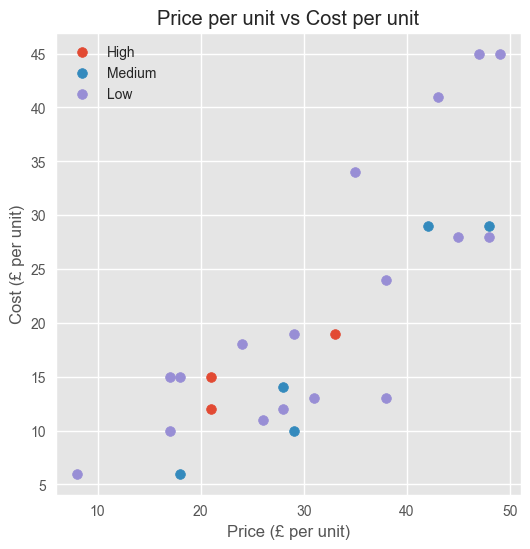

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(summary_data_high["Price"], summary_data_high["Cost"])
ax.scatter(summary_data_medium["Price"], summary_data_medium["Cost"])
ax.scatter(summary_data_low["Price"], summary_data_low["Cost"])

ax.set(title="Price per unit vs Cost per unit",
       xlabel="Price (£ per unit)",
       ylabel="Cost (£ per unit)")
ax.legend(["High", "Medium","Low"], loc="best")
plt.show()

# Data conclusions

- Reminder - we are not making business recommendations
	- let the business analyst decide what to do
- However …
	- can identify some strongly correlated products
	- it might make sense to group these together (for example, if product H was withdrawn, would people stop buying M & O too)
	- also looked at correlations in the product summary data

### - Looked at visualising correlations
	- scatter plots
	- heat maps
- Can easily detect & visualise correlations and then, for example, explore them in the original time-series data
